In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf 
from tensorflow import keras 
import seaborn as sns 
import os 
from datetime import datetime

C:\Users\Admin\miniconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Admin\miniconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Admin\miniconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Admin\miniconda3\envs\tensorflow_e

In [2]:
np.__version__

'1.18.5'

In [3]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.float_format', lambda x: '%.2f' % x)
# pd.set_option("mode.copy_on_write", True)

In [6]:
dfRaw = pd.read_csv(r'.\NIFTY50_all.csv', na_values=['null'],
               index_col='Date',parse_dates=True,infer_datetime_format=True)

In [7]:
dfRaw

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,ZEEL,EQ,188.00,190.60,191.10,185.10,186.70,186.40,187.35,8542755,1.600451e+14,52374.0,2340188.0,0.2739
2021-04-27,ZEEL,EQ,186.40,188.00,192.95,186.80,188.80,188.15,189.41,14247767,2.698636e+14,73673.0,5425957.0,0.3808
2021-04-28,ZEEL,EQ,188.15,188.80,190.60,187.10,188.95,189.10,188.85,8429439,1.591917e+14,44056.0,2413974.0,0.2864


In [8]:
dfRaw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 235192 entries, 2007-11-27 to 2021-04-30
Data columns (total 14 columns):
Symbol                235192 non-null object
Series                235192 non-null object
Prev Close            235192 non-null float64
Open                  235192 non-null float64
High                  235192 non-null float64
Low                   235192 non-null float64
Last                  235192 non-null float64
Close                 235192 non-null float64
VWAP                  235192 non-null float64
Volume                235192 non-null int64
Turnover              235192 non-null float64
Trades                120344 non-null float64
Deliverable Volume    219115 non-null float64
%Deliverble           219115 non-null float64
dtypes: float64(11), int64(1), object(2)
memory usage: 26.9+ MB


In [9]:
df = dfRaw.copy()

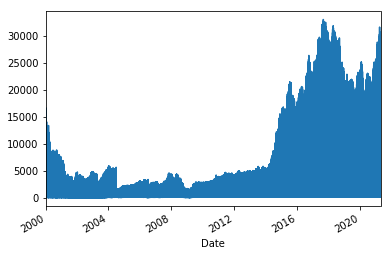

In [13]:
df['VWAP'].plot()

In [15]:
output_var = pd.DataFrame(df['VWAP'])

features = ['Open', 'High', 'Low', 'Volume']

In [16]:
df[features].describe()

,Open,High,Low,Volume
count,235192.000000,235192.000000,235192.000000,2.351920e+05
mean,1267.759708,1286.581440,1247.488465,3.045903e+06
std,2585.259609,2619.649216,2546.621396,7.333981e+06
min,8.500000,9.750000,8.500000,3.000000e+00
25%,275.000000,279.500000,269.600000,2.190095e+05
50%,567.025000,576.900000,556.500000,1.010938e+06
75%,1243.312500,1263.000000,1221.650000,3.019851e+06
max,33399.950000,33480.000000,32468.100000,4.810589e+08


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2007-11-27,0.022805,0.031080,0.023460,0.056738
2007-11-28,0.029214,0.029287,0.026664,0.009523
2007-11-29,0.026968,0.027039,0.025647,0.010652
2007-11-30,0.026399,0.028331,0.027157,0.009583
2007-12-03,0.027889,0.029437,0.028143,0.006189


In [18]:
feature_transform[features].describe()

,Open,High,Low,Volume
count,235192.000000,235192.000000,235192.000000,235192.000000
mean,0.037712,0.038148,0.038170,0.006332
std,0.077423,0.078268,0.078455,0.015245
min,0.000000,0.000000,0.000000,0.000000
25%,0.007981,0.008059,0.008044,0.000455
50%,0.016727,0.016945,0.016883,0.002101
75%,0.036980,0.037444,0.037374,0.006278
max,1.000000,1.000000,1.000000,1.000000


In [20]:
from sklearn.model_selection import TimeSeriesSplit
timesplit= TimeSeriesSplit(n_splits=10) # 90-10%
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [22]:
print(X_train.shape)
print(X_test.shape)

(213811, 4)
(21381, 4)


In [23]:
print(y_train.shape)
print(y_test.shape)

(213811,)
(21381,)


In [24]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])
print(X_train.shape)
print(X_test.shape)

(213811, 1, 4)
(21381, 1, 4)


In [25]:
X_train

array([[[0.02280524, 0.03107984, 0.02345993, 0.05673809]],

       [[0.02921407, 0.0292872 , 0.02666391, 0.00952344]],

       [[0.02696798, 0.02703894, 0.02564727, 0.01065175]],

       ...,

       [[0.10845591, 0.10965708, 0.11101492, 0.00061199]],

       [[0.10977361, 0.11017695, 0.11112583, 0.00034101]],

       [[0.10881977, 0.10995586, 0.11178973, 0.00034157]]])

In [27]:
import tensorflow as tf
lstm = tf.keras.Sequential()
lstm.add(tf.keras.layers.LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(tf.keras.layers.Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam',metrics = ['mse'])

In [31]:
train_metrics=lstm.fit(X_train, y_train, epochs=100, batch_size=100, verbose=1, shuffle=False,validation_data=(X_test, y_test))

Train on 213811 samples, validate on 21381 samples
Epoch 1/100
213811/213811 [==============================]213811/213811 [==============================] - 26s 120us/step - loss: 4234983.1816 - mean_squared_error: 4234983.1816 - val_loss: 217227.0126 - val_mean_squared_error: 217227.0126

Epoch 2/100
213811/213811 [==============================]213811/213811 [==============================] - 26s 121us/step - loss: 4025008.8656 - mean_squared_error: 4025008.8656 - val_loss: 173174.3532 - val_mean_squared_error: 173174.3532

Epoch 3/100
213811/213811 [==============================]213811/213811 [==============================] - 25s 117us/step - loss: 3829991.6435 - mean_squared_error: 3829991.6435 - val_loss: 135911.6523 - val_mean_squared_error: 135911.6523

Epoch 4/100
213811/213811 [==============================]213811/213811 [==============================] - 26s 121us/step - loss: 3646891.4818 - mean_squared_error: 3646891.4818 - val_loss: 106227.1037 - val_mean_squared_error

In [32]:
history_df = pd.DataFrame(train_metrics.history)
history_df

,loss,mean_squared_error,val_loss,val_mean_squared_error
0,4.234983e+06,4.234983e+06,217227.012635,217227.012635
1,4.025009e+06,4.025009e+06,173174.353231,173174.353231
2,3.829992e+06,3.829992e+06,135911.652320,135911.652320
3,3.646891e+06,3.646891e+06,106227.103683,106227.103683
4,3.474444e+06,3.474444e+06,83416.135783,83416.135783
...,...,...,...,...
95,5.516028e+02,5.516028e+02,224.853980,224.853980
96,5.512646e+02,5.512646e+02,224.548948,224.548948
97,5.494797e+02,5.494797e+02,223.818698,223.818698
98,5.497907e+02,5.497907e+02,223.488562,223.488562


In [33]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

In [34]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 222.97613986595942


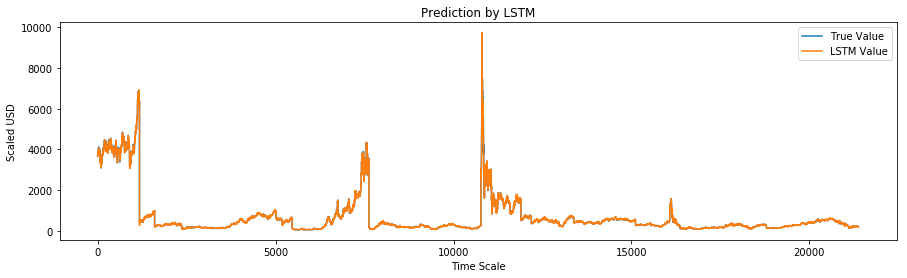

In [42]:
#Predicted vs True Adj Close Value – LSTM
import matplotlib.pyplot as plt
plt.figure().set_figwidth(15)
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()